The Karate Club Network is used in this colab. (https://en.wikipedia.org/wiki/Zachary%27s_karate_club). Our objective will be to write code for Node Classification:

1.   Graphical Convolutional Network (GCN)
2.   By learning node embedding using Random Walk
3.   By learning node embedding using Node2Vec

## **Libraries**
Installing important libraries used for this assignment

In [ ]:
#Node2Vec library is a popular algorithm for learning node embeddings in graph data.
#After running this cell, they show some red line so ignore that lines. They successfully installed the library
!pip install node2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.6 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.3
    Uninstalling networkx-3.3:
      Successfully uninstalled networkx-3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.2.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.

In [ ]:
# These library will take 20-30 or more minutes to install

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
# torch-scatter library provides efficient scatter operations on sparse tensors, which are commonly used in graph neural networks

!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
# Sparse tensor operations allow us to perform computations efficiently on this kind of data.

!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git
#This is a library for geometric deep learning with PyTorch, specifically designed for handling graph-structured data.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


# **Setup**
Importing all the necessary libraries

In [ ]:
import os
import torch
from torch_geometric.utils import to_networkx
from torch_geometric.datasets import KarateClub
from torch.nn import Linear
from torch_geometric.nn import GCNConv
import torch.nn as nn
import torch.nn.functional as F

import networkx as nx
from node2vec import Node2Vec

from scipy.linalg import sqrtm
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# **Zachary's Karate Club Network**

In [ ]:
#  Load Zachary's karate club network
dataset = KarateClub()

print(f'Number of features = {dataset.num_features}')

Number of features = 34


In [ ]:
# Important Parameter of the graph
data = dataset[0]
print(f'Number of nodes = {data.num_nodes}')
print(f'Number of edges = {data.num_edges}') # This is undirected graph so it shows 2*total number of edges
print(f'Average node degree = {data.num_edges / data.num_nodes:.2f}')

Number of nodes = 34
Number of edges = 156
Average node degree = 4.59


# **Graph Visualization**

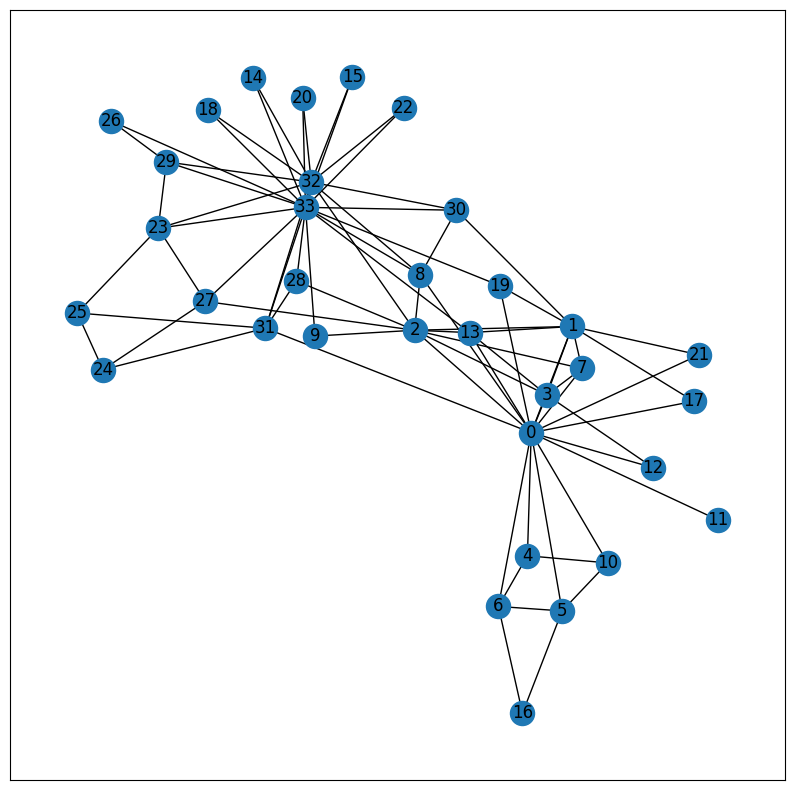

In [ ]:
# First convert the Pytorch Geometric Graph into NetworkX Graph
G = to_networkx(data, to_undirected=True)

# Graph Visulaization
plt.figure(figsize=(10,10))
nx.draw_networkx(G,with_labels=True)
plt.show()

# **1. Graphical Convolutional Networks (Using Formula)**

In [ ]:
# Load Karate Club dataset
g = nx.karate_club_graph()

# Convert graph to adjacency matrix
A = nx.to_numpy_array(g)

# Add self-connections
A_mod = A + np.eye(g.number_of_nodes())

# Calculate degree matrix with self-connections
D_mod = np.zeros_like(A_mod)
np.fill_diagonal(D_mod, np.asarray(A_mod.sum(axis=1)).flatten())

# Calculate inverse square root of degree matrix
D_mod_invroot = np.linalg.inv(sqrtm(D_mod))

# Normalize adjacency matrix
A_hat = D_mod_invroot @ A_mod @ D_mod_invroot

# Generate node labels (ground truth)
labels = np.array([1 if g.nodes[node]['club'] == 'Officer' else 0 for node in g.nodes()])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(A_hat, labels, test_size=0.2, random_state=42)

# Define the GCN model
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model1.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

# Evaluate the model
loss, accuracy = model1.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

Epoch 1/50
2/2 [==============================] - 1s 21ms/step - loss: 0.6959 - accuracy: 0.4815
Epoch 2/50
2/2 [==============================] - 0s 8ms/step - loss: 0.6932 - accuracy: 0.4815
Epoch 3/50
2/2 [==============================] - 0s 9ms/step - loss: 0.6909 - accuracy: 0.5185
Epoch 4/50
2/2 [==============================] - 0s 9ms/step - loss: 0.6886 - accuracy: 0.5185
Epoch 5/50
2/2 [==============================] - 0s 8ms/step - loss: 0.6862 - accuracy: 0.5556
Epoch 6/50
2/2 [==============================] - 0s 9ms/step - loss: 0.6839 - accuracy: 0.5556
Epoch 7/50
2/2 [==============================] - 0s 8ms/step - loss: 0.6817 - accuracy: 0.5556
Epoch 8/50
2/2 [==============================] - 0s 8ms/step - loss: 0.6794 - accuracy: 0.5926
Epoch 9/50
2/2 [==============================] - 0s 8ms/step - loss: 0.6771 - accuracy: 0.6296
Epoch 10/50
2/2 [==============================] - 0s 7ms/step - loss: 0.6749 - accuracy: 0.6667
Epoch 11/50
2/2 [=====================

2/2 [==============================] - 0s 6ms/step


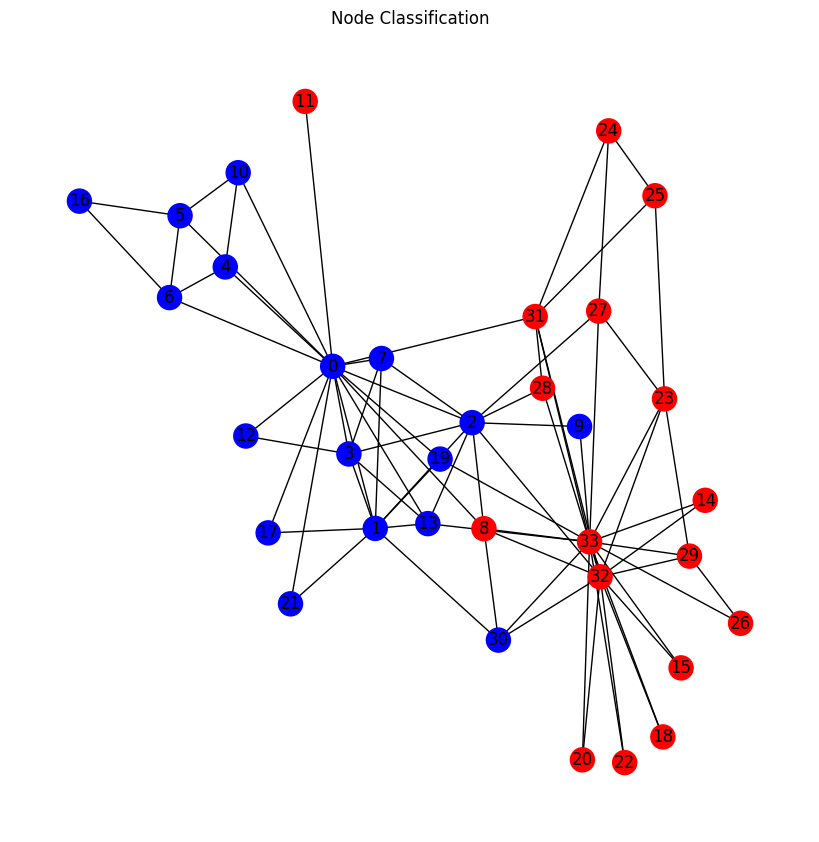

In [ ]:
# Predict labels for all nodes
predicted_labels = model1.predict(A_hat)

# Threshold predicted labels (0.5 for binary classification)
binary_predicted_labels = (predicted_labels > 0.5).astype(int)

# Assign colors based on predicted labels
node_colors = ['red' if label == 1 else 'blue' for label in binary_predicted_labels]

# Plot the graph with node colors
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(g)
nx.draw(G, with_labels=True,node_color=node_colors)
plt.title('Node Classification')
plt.show()

2/2 [==============================] - 0s 6ms/step


<ipython-input-9-98a5d3e2105e>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(node_embeddings_2d[:, 0], node_embeddings_2d[:, 1], c=node_colors, cmap=plt.cm.coolwarm)


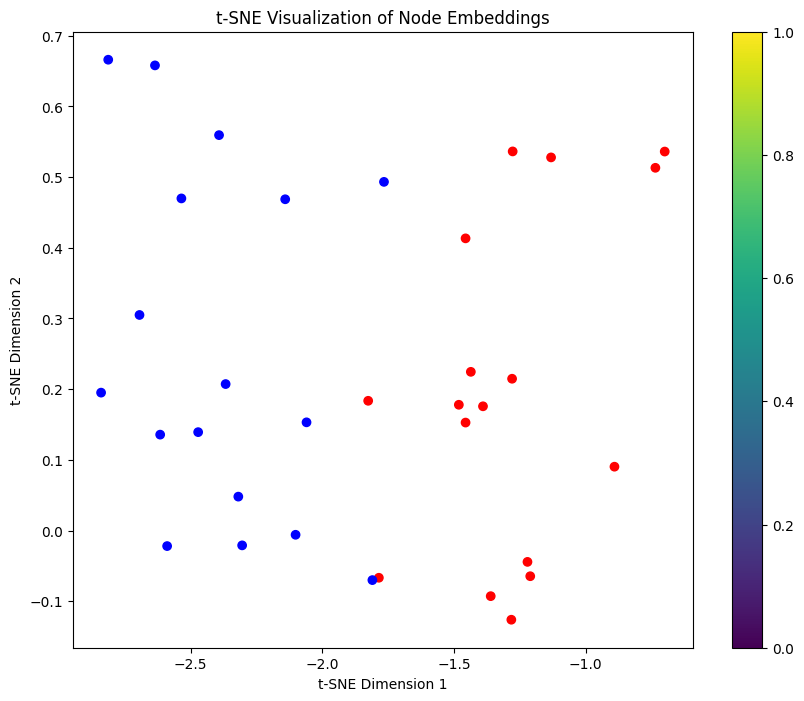

In [ ]:
# Extract node embeddings from the model
node_embeddings_model = tf.keras.Model(inputs=model1.input, outputs=model1.layers[-2].output)
node_embeddings = node_embeddings_model.predict(A_hat)

# Apply t-SNE to reduce dimensionality
tsne = TSNE(n_components=2, random_state=42)
node_embeddings_2d = tsne.fit_transform(node_embeddings)

# Plot the t-SNE embeddings
plt.figure(figsize=(10, 8))
plt.scatter(node_embeddings_2d[:, 0], node_embeddings_2d[:, 1], c=node_colors, cmap=plt.cm.coolwarm)
plt.title('t-SNE Visualization of Node Embeddings')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar()
plt.show()

In [ ]:
# Print embeddings of each node
for node_index, embedding in enumerate(node_embeddings):
    print(f"Node {node_index} embedding: {embedding}")

Node 0 embedding: [0.         0.         0.25869623 0.         0.09407976 0.
 0.11915983 0.03301687 0.         0.28437686 0.         0.
 0.19461676 0.         0.         0.16035964]
Node 1 embedding: [0.10922916 0.09507809 0.14167906 0.         0.10555588 0.
 0.11653852 0.12419912 0.         0.22143881 0.00581514 0.
 0.31166306 0.00079998 0.01855196 0.        ]
Node 2 embedding: [0.01282704 0.06151562 0.12299576 0.06409068 0.07634733 0.06039207
 0.1449407  0.09997635 0.         0.13074553 0.01065843 0.
 0.20655672 0.01092274 0.         0.        ]
Node 3 embedding: [0.         0.10205094 0.19675559 0.         0.15521514 0.
 0.20362978 0.04353515 0.         0.1468677  0.         0.
 0.34798616 0.         0.         0.18449695]
Node 4 embedding: [0.12437702 0.         0.25077003 0.         0.         0.
 0.17803863 0.18842044 0.         0.15152982 0.07412277 0.
 0.10138087 0.         0.         0.07265891]
Node 5 embedding: [0.08851396 0.         0.3061408  0.         0.         0.
 0.13

# **Graphical Convolutional Networks (Using Built-in Function)**

In [ ]:
class GCN(torch.nn.Module):
# Initialization
    def __init__(self):
        super(GCN, self).__init__()
        torch.manual_seed(12345) # For Random operation within the model
        self.conv1 = GCNConv(dataset.num_features, 4) # It takes input the number of features and output a 4 dimensional feature space
        self.conv2 = GCNConv(4, 2) # It takes previous layer 4 dimensional feature space as input and output a 2 dimensional feature space
        self.classifier = Linear(2, dataset.num_classes) # We use linear classifier to classify the number of output classes

# Forward Pass
    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.
        out = self.classifier(h)# Apply a final (linear) classifier.

        return out, h

In [ ]:
# Print the architecture and parameters of the GCN model
model = GCN()
print(model)

GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


## **Training the Model**

In [ ]:
def train(data):
    optimizer.zero_grad()  # Clear gradients if we do not do that the previous gradient also add in the next gradient value
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Backward Pass automatically calculate the gradient
    optimizer.step()  # Update parameters based on gradients.
    return loss, h

In [ ]:
# Lists to store loss and accuracy values
losses = []
accuracies = []
epochs = 100
criterion = torch.nn.CrossEntropyLoss()  #Initialize the CrossEntropyLoss function.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
for epoch in range(epochs):
    loss, h = train(data)
    losses.append(loss.item())
    print(f'Epoch {epoch+1}, Loss = {loss:.6f}')

Epoch 1, Loss = 1.436653
Epoch 2, Loss = 1.426920
Epoch 3, Loss = 1.417113
Epoch 4, Loss = 1.407221
Epoch 5, Loss = 1.397214
Epoch 6, Loss = 1.387060
Epoch 7, Loss = 1.376716
Epoch 8, Loss = 1.366142
Epoch 9, Loss = 1.355313
Epoch 10, Loss = 1.344218
Epoch 11, Loss = 1.332850
Epoch 12, Loss = 1.321196
Epoch 13, Loss = 1.309232
Epoch 14, Loss = 1.296923
Epoch 15, Loss = 1.284227
Epoch 16, Loss = 1.271110
Epoch 17, Loss = 1.257551
Epoch 18, Loss = 1.243546
Epoch 19, Loss = 1.229104
Epoch 20, Loss = 1.214244
Epoch 21, Loss = 1.198987
Epoch 22, Loss = 1.183347
Epoch 23, Loss = 1.167330
Epoch 24, Loss = 1.150938
Epoch 25, Loss = 1.134173
Epoch 26, Loss = 1.117043
Epoch 27, Loss = 1.099559
Epoch 28, Loss = 1.081736
Epoch 29, Loss = 1.063585
Epoch 30, Loss = 1.045107
Epoch 31, Loss = 1.026298
Epoch 32, Loss = 1.007155
Epoch 33, Loss = 0.987688
Epoch 34, Loss = 0.967924
Epoch 35, Loss = 0.947906
Epoch 36, Loss = 0.927686
Epoch 37, Loss = 0.907314
Epoch 38, Loss = 0.886831
Epoch 39, Loss = 0.86

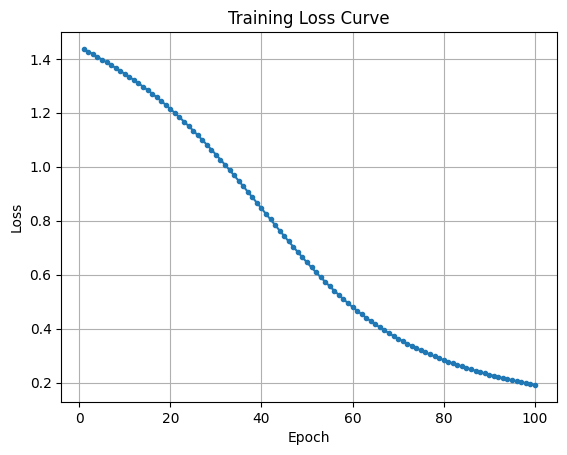

In [ ]:
# Plotting the Training Loss Curve
plt.plot(range(1, len(losses) + 1), losses, marker='.')
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [ ]:
# Evaluate the dataset
model.eval()
with torch.no_grad():
    logits, _ = model(data.x, data.edge_index)
    pred = logits.argmax(dim=1)
    correct = pred.eq(data.y)
    accuracy = correct.to(torch.float).mean().item()
    accuracies.append(accuracy)

# Print accuracy
print(f'Accuracy of GCN: {accuracy:.6f}')

Accuracy of GCN: 0.823529


## **Node Embedding Visulization**

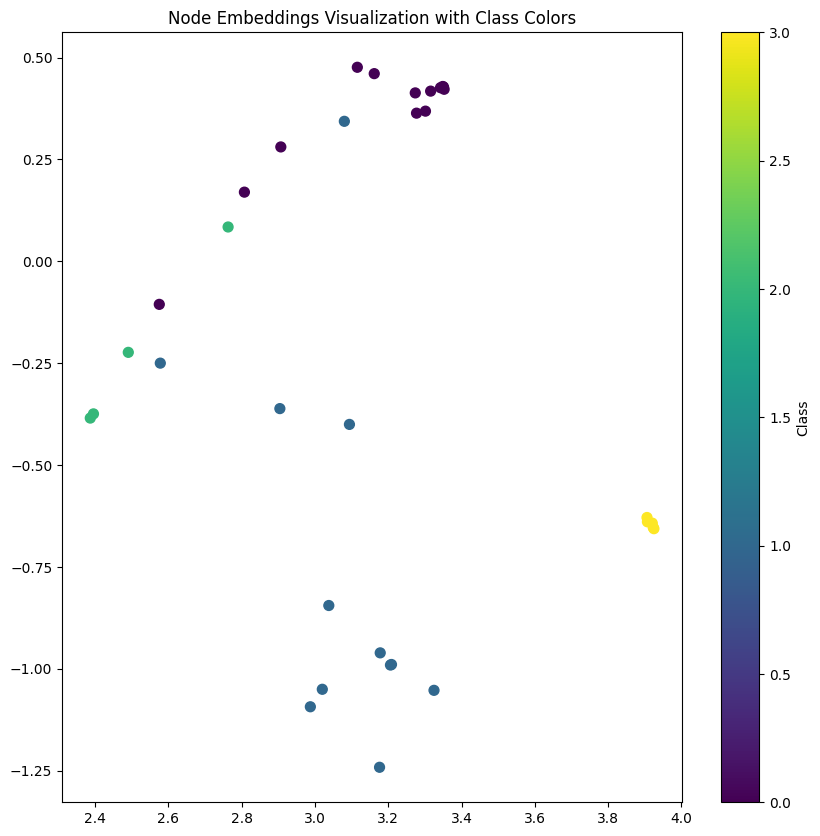

In [ ]:
data = dataset[0]
out, embeddings = model(data.x, data.edge_index)

# Convert embeddings to a NumPy array
embeddings = embeddings.detach().numpy()

# Apply dimensionality reduction (e.g., t-SNE) for visualization
reduced_embeddings = TSNE(n_components=2).fit_transform(embeddings)

# Get the class labels for each node
node_labels = [data.y[node] for node in range(len(data.y))]

# Create a scatter plot to visualize the embeddings
plt.figure(figsize=(10, 10))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=node_labels, cmap='viridis', s=50)
plt.title("Node Embeddings Visualization with Class Colors")
plt.colorbar(label='Class')
plt.show()

In [ ]:
# Display all node embeddings
print("Node Embeddings:")
for i, embedding in enumerate(embeddings):
    print(f"Node {i+1}: {' '.join(map(str, embedding))}")

Node Embeddings:
Node 1: -0.9093286 -0.9724747
Node 2: -0.90094537 -0.57261264
Node 3: -0.49385574 0.80011463
Node 4: -0.79346424 -0.54207987
Node 5: 0.85577077 -0.8949855
Node 6: 0.8652066 -0.9639261
Node 7: 0.8615215 -0.9668971
Node 8: -0.4735576 -0.28754187
Node 9: 0.8568247 0.93150747
Node 10: 0.7112407 0.9343711
Node 11: 0.83795613 -0.9047762
Node 12: -0.44622803 -0.8210823
Node 13: -0.4889223 -0.61866504
Node 14: -0.08161536 0.30069876
Node 15: 0.9265318 0.9676572
Node 16: 0.93462914 0.9685854
Node 17: 0.8703317 -0.94233537
Node 18: -0.4944479 -0.61914283
Node 19: 0.9067709 0.9644483
Node 20: 0.11183651 0.111177586
Node 21: 0.93096405 0.9647137
Node 22: -0.48251507 -0.554109
Node 23: 0.9317768 0.96918494
Node 24: 0.21733157 0.98067415
Node 25: -0.9417241 0.9042923
Node 26: -0.91698617 0.9033547
Node 27: 0.87645 0.9602583
Node 28: -0.37501842 0.95806116
Node 29: 0.054305185 0.94607335
Node 30: 0.8660096 0.9818567
Node 31: 0.8395666 0.93050915
Node 32: -0.6126005 0.9380294
Node 33:

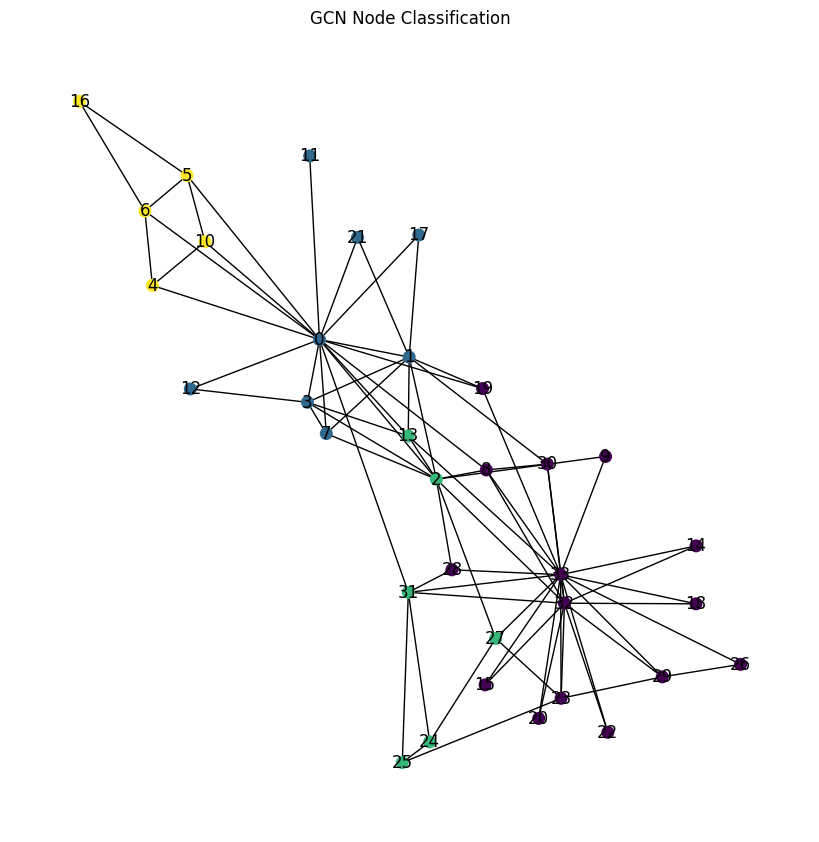

In [ ]:
# Create a color map from the prediction results
color_map = [pred[i].item() for i in range(data.num_nodes)]

# Draw the graph
plt.figure(figsize=(8, 8))
nx.draw(G, node_color=color_map, with_labels=True, node_size=70, cmap='viridis')
plt.title("GCN Node Classification")
plt.show()

# **2. By learning Node Embedding using Random Walk**

In [ ]:
# Load the Karate Club Network
karate_club = nx.karate_club_graph()

# Define labels for nodes
labels = [karate_club.nodes[node]['club'] for node in karate_club.nodes()]

In [ ]:
# Function to generate random walks for node embeddings
def generate_random_walks(graph, num_walks, walk_length):
    walks = []
    for _ in range(num_walks):
        for node in graph.nodes():
            walk = [node]
            current_node = node
            for _ in range(walk_length - 1):
                neighbors = list(graph.neighbors(current_node))
                if len(neighbors) == 0:
                    break
                next_node = np.random.choice(neighbors)
                walk.append(next_node)
                current_node = next_node
            walks.append(walk)
    return walks

# Generate random walks
num_walks = 100
walk_length = 10
random_walks = generate_random_walks(karate_club, num_walks, walk_length)

In [ ]:
# Function to extract unique nodes from random walks
def extract_unique_nodes(random_walks):
    unique_nodes = set()
    for walk in random_walks:
        unique_nodes.update(walk)
    return list(unique_nodes)

# Create unique nodes list
unique_nodes = extract_unique_nodes(random_walks)

In [ ]:
# Function to create node embedding matrix from random walks
def create_embedding_matrix(random_walks, unique_nodes, dimensions=64):
    embedding_matrix = {}
    for node in unique_nodes:
        embedding_matrix[node] = np.random.rand(dimensions)  # Random initialization for nodes not present in walks
    for walk in random_walks:
        for node in walk:
            if node not in embedding_matrix:
                embedding_matrix[node] = np.random.rand(dimensions)  # Random initialization for unseen nodes
    return np.array([embedding_matrix[node] for node in unique_nodes])

# Create node embeddings matrix
features = create_embedding_matrix(random_walks, unique_nodes)

## **Calculate the accuracy**

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train a logistic regression classifier
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

# Make predictions
predictions = classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print(f'Accuracy: {accuracy}')

Accuracy: 0.5714285714285714


## **Node Embeddings**

In [ ]:
# Print embeddings of each node
for node, embedding in zip(unique_nodes, features):
    print(f"Node {node+1}: {embedding}")

Node 1: [0.08800322 0.11467971 0.51664978 0.34493504 0.04123897 0.62013103
 0.57586744 0.13041965 0.9341359  0.25715372 0.44491422 0.49919202
 0.15762018 0.29378682 0.80338014 0.2350003  0.46708151 0.08652082
 0.46187092 0.42552818 0.58583651 0.72064008 0.64642083 0.81517606
 0.28395076 0.21081548 0.77904149 0.25981633 0.34950765 0.06948252
 0.30992924 0.14709438 0.51671427 0.46650601 0.36316612 0.98840399
 0.21796443 0.61333503 0.94124937 0.62968226 0.91613619 0.85470519
 0.48846668 0.80019103 0.86098989 0.16930264 0.48421877 0.31572684
 0.85247326 0.41110223 0.69830437 0.412733   0.53460069 0.244517
 0.88329603 0.35524597 0.70969409 0.63813083 0.61936583 0.41544504
 0.78929301 0.78190173 0.49860194 0.93275796]
Node 2: [0.57824608 0.55029335 0.43343977 0.71729904 0.65058647 0.36269303
 0.74456183 0.43534519 0.41668988 0.28875    0.68762257 0.28590923
 0.35048667 0.81616408 0.50021154 0.23958277 0.94829628 0.55927179
 0.34750872 0.34527412 0.21695444 0.66861931 0.1182531  0.04461825
 0

## **PCA Plot**

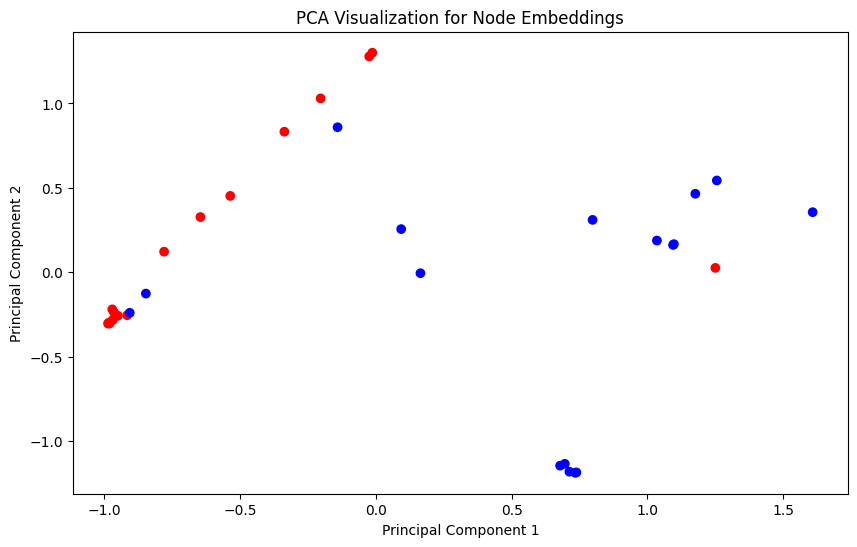

In [ ]:
# Perform PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(embeddings)

# Plot the PCA visualization
plt.figure(figsize=(10, 6))
plt.scatter(pca_embeddings[:, 0], pca_embeddings[:, 1], c=node_colors)
plt.title('PCA Visualization for Node Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## **Graph Visualization using Random Walk**

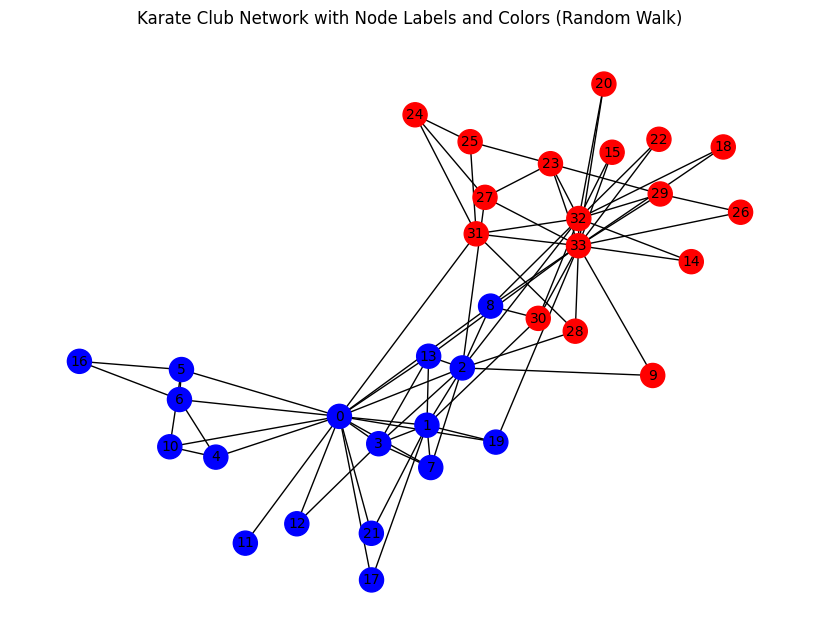

In [ ]:
# Define labels for nodes (node numbers)
labels = {node: str(node) for node in karate_club.nodes()}

# Define colors for nodes based on their club membership
club_colors = {'Mr. Hi': 'b', 'Officer': 'r'}

# Assign colors to nodes based on their club membership
node_colors = [club_colors[karate_club.nodes[node]['club']] for node in karate_club.nodes()]

# Plot the graph with node labels and different colors
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(karate_club)  # Position nodes using Fruchterman-Reingold force-directed algorithm
nx.draw(karate_club, pos, with_labels=True, labels=labels, node_color=node_colors, font_size=10)
plt.title("Karate Club Network with Node Labels and Colors (Random Walk)")
plt.show()

# **3. By learning node embedding using Node2Vec**

In [ ]:
# Generate walks
node2vec = Node2Vec(karate_club, dimensions=128, walk_length=80, num_walks=10)
model = node2vec.fit(window=10, min_count=1, workers=2)

# Get node embeddings
node_embeddings = {node: model.wv[str(node)] for node in karate_club.nodes()}

# Extract node embeddings
node_ids = list(node_embeddings.keys())
embeddings = [node_embeddings[node] for node in node_ids]

# Print embedding of each node
for i, node_id in enumerate(node_ids):
    print(f'Node {node_id}: {embeddings[i]}')

plt.show()

Computing transition probabilities:   0%|          | 0/34 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 34.28it/s]


Node 0: [-0.06881608  0.06343021  0.23455374 -0.06833615 -0.07866751 -0.17179921
 -0.00293684 -0.0080645   0.01223646  0.03967734  0.20502684  0.10619054
  0.05645772 -0.21066052  0.00043078 -0.17084746  0.01916147  0.22597
 -0.02441595  0.02816297 -0.0322367   0.0922005   0.09536076  0.00752799
 -0.08791056  0.1977063  -0.02591426  0.14361851  0.05204021 -0.04640194
 -0.1530936   0.06269997 -0.15047131 -0.00198578 -0.07574808 -0.01885047
  0.136615    0.04978757  0.15362786 -0.00434688  0.00998924  0.2034022
 -0.10304974 -0.06058487  0.11051624  0.07828929  0.01326956 -0.13512369
 -0.0493603   0.00773667  0.14004208  0.03555697  0.09507389  0.15590288
 -0.01276102  0.07916365 -0.02530506 -0.04475619 -0.02445224  0.03612851
  0.1356904  -0.08572132  0.04321493  0.08483654  0.06238462 -0.08609236
 -0.01068447 -0.00497064  0.06367677 -0.1539023  -0.0113439  -0.14557014
 -0.09518792 -0.05415804 -0.01739683 -0.02496281  0.05675541  0.03642462
  0.01187512  0.18069339 -0.07490707 -0.0156456

## **PCA Plot**

<ipython-input-29-19532d8df3db>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=node_colors, cmap=plt.get_cmap('coolwarm'))


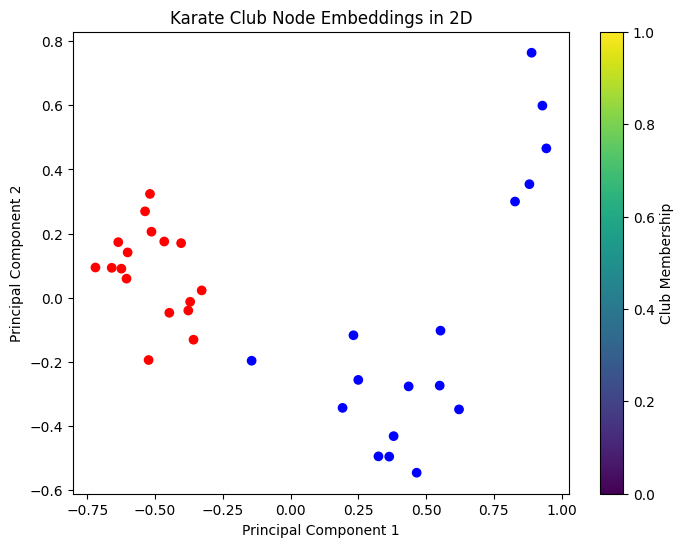

In [ ]:
# Apply PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Plot the 2D embeddings
plt.figure(figsize=(8, 6))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=node_colors, cmap=plt.get_cmap('coolwarm'))
plt.title("Karate Club Node Embeddings in 2D")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Club Membership')
plt.show()

## **Graph Visualization (Node Classify using different Color)**

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


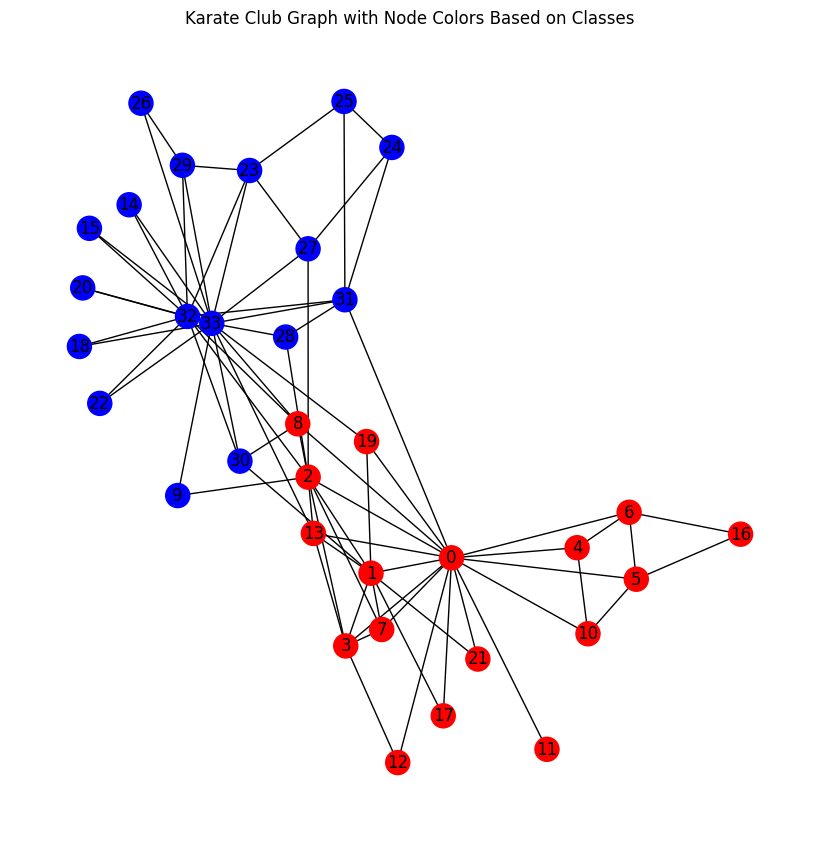

In [ ]:
# Assign colors based on the club membership of each node
node_colors = ['r' if karate_club.nodes[node]['club'] == 'Mr. Hi' else 'b' for node in karate_club.nodes()]

# Plot the graph with nodes colored by class
plt.figure(figsize=(8, 8))
nx.draw(G, with_labels=True, node_color=node_colors, cmap=plt.get_cmap('coolwarm'))
plt.title("Karate Club Graph with Node Colors Based on Classes")
plt.show()